# ECSE 415 Assignment 1
### Tyler Young | 260730324
#### Feb. 11, 2020

In [432]:
# imports
import numpy as np
import cv2
import matplotlib.pyplot as plt


## Part 1: Denoising

In [433]:
# load images
image_path1 = "./gaussian_lighthouse.png"
img_gaussian = cv2.imread(image_path1)

image_path2 = "./lighthouse.png"
img_lighthouse = cv2.imread(image_path2)

image_path3 = "./saltandpepper_lighthouse.png"
img_splighthouse = cv2.imread(image_path3)

# convert from BGR to RGB
img_gaussian = cv2.cvtColor(img_gaussian, cv2.COLOR_BGR2RGB)
img_lighthouse = cv2.cvtColor(img_lighthouse, cv2.COLOR_BGR2RGB)
img_splighthouse = cv2.cvtColor(img_splighthouse, cv2.COLOR_BGR2RGB)

### Questions 1 - 3

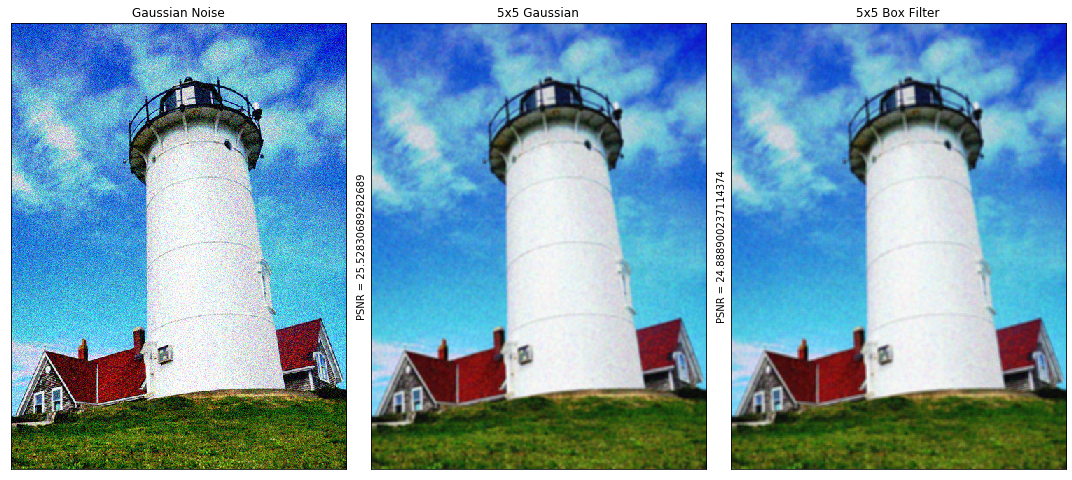

In [434]:
# filter image using 5x5 Gaussian, with variance 2 
res_gaussian = cv2.GaussianBlur(img_gaussian, (5,5), 2)

# filter image using a 5x5 box filter
res_box = cv2.blur(img_gaussian, (5,5))

# evaluate PSNR for the denoised and clean images
psnr_gaussian = cv2.PSNR(img_lighthouse, res_gaussian)
psnr_box = cv2.PSNR(img_lighthouse, res_box)
    
# plot and show images
plt.figure(figsize = (15, 15))
plt.subplot(131), plt.imshow(img_gaussian), plt.title("Gaussian Noise") 
plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(res_gaussian), plt.title("5x5 Gaussian")
plt.xticks([]), plt.yticks([]), plt.ylabel(str.format("PSNR = {}", psnr_gaussian))

plt.subplot(133), plt.imshow(res_box), plt.title("5x5 Box Filter")
plt.xticks([]), plt.yticks([]), plt.ylabel(str.format("PSNR = {}", psnr_box))

plt.tight_layout()

As you can see from the printed PSNR values, the 5x5 Gaussian filter with variance 2 has a higher PSNR value, meaning a better quality of reconstructed image. Therefore, in this situation, the Gaussian method is superior to the box filter method. 

### Questions 4 - 6

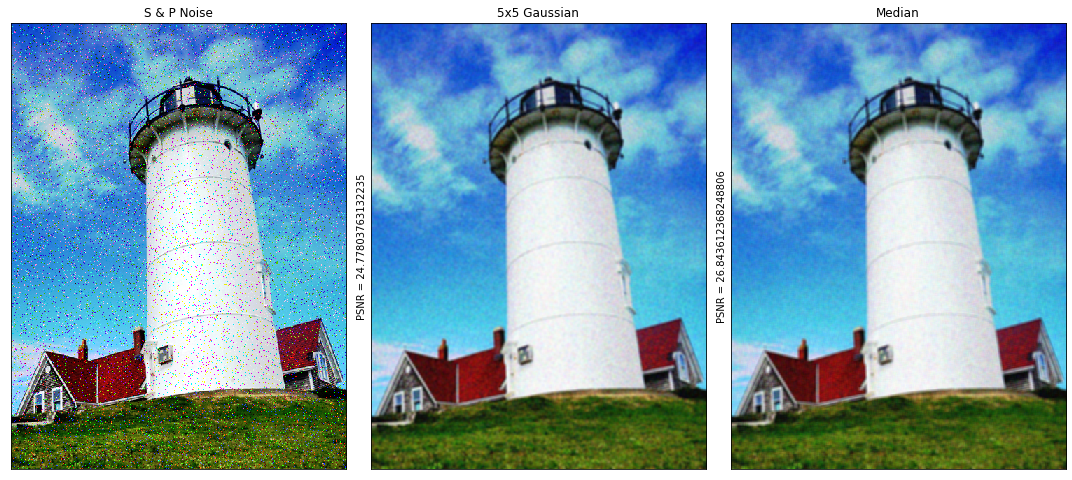

In [435]:
# filter the salt and pepper noise image with the same Gaussian filter
res_gaussian2 = cv2.GaussianBlur(img_splighthouse, (5,5), 2)

# filter the salt ane pepper noise image with a median filter
res_median = cv2.medianBlur(img_splighthouse, 5)

# evaluate PSNR for the denoised and clean images
psnr_gaussian2 = cv2.PSNR(img_lighthouse, res_gaussian2)
psnr_median = cv2.PSNR(img_lighthouse, res_median)

# plot and show images
plt.figure(figsize = (15, 15))
plt.subplot(131), plt.imshow(img_splighthouse), plt.title("S & P Noise") 
plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(res_gaussian), plt.title("5x5 Gaussian")
plt.xticks([]), plt.yticks([]), plt.ylabel(str.format("PSNR = {}", psnr_gaussian2))

plt.subplot(133), plt.imshow(res_box), plt.title("Median")
plt.xticks([]), plt.yticks([]), plt.ylabel(str.format("PSNR = {}", psnr_median))

plt.tight_layout()

As you can see from the printed PSNR values, the median filter has a higher PSNR value, meaning a better quality of reconstructed image. Therefore, in this situation, the median method is superior to the Gaussian filter method. 

## Part 2: Sobel Edge Detector

### Question 1

(Text(0.5, 1.0, 'S 7x7, T 0.2'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

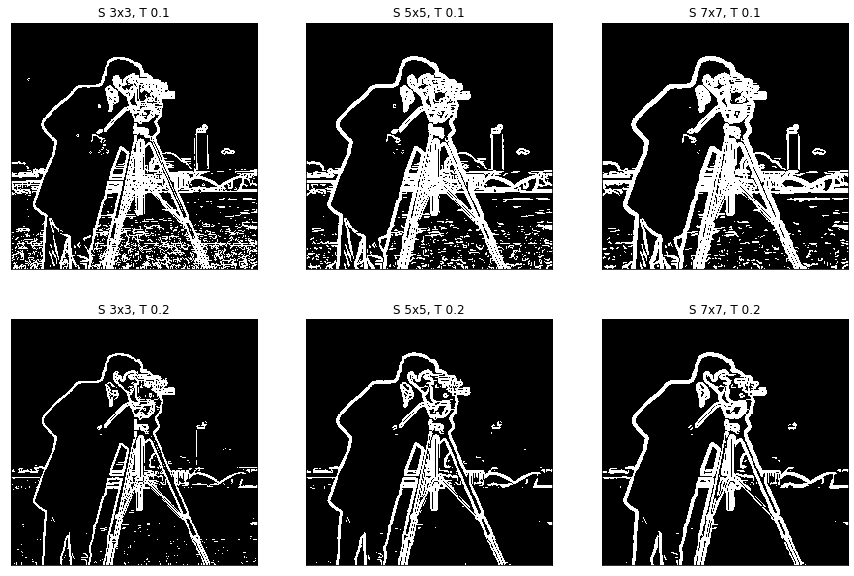

In [436]:
# load images as grayscale
image_path4 = "./cameraman.png"
img_cameraman = cv2.imread(image_path4, cv2.IMREAD_GRAYSCALE)

image_path5 = "./gaussian_cameraman.png"
img_gausscameraman = cv2.imread(image_path5, cv2.IMREAD_GRAYSCALE)

# apply the Sobel filter to the x and y intensities
I_3x = cv2.Sobel(img_cameraman, cv2.CV_64F, 1, 0, ksize=3)
I_3y = cv2.Sobel(img_cameraman, cv2.CV_64F, 0, 1, ksize=3)

I_5x = cv2.Sobel(img_cameraman, cv2.CV_64F, 1, 0, ksize=5)
I_5y = cv2.Sobel(img_cameraman, cv2.CV_64F, 0, 1, ksize=5)

I_7x = cv2.Sobel(img_cameraman, cv2.CV_64F, 1, 0, ksize=7)
I_7y = cv2.Sobel(img_cameraman, cv2.CV_64F, 0, 1, ksize=7)

# compute the Sobel magnitudes
sobel_3 = cv2.magnitude(I_3x, I_3y)
sobel_5 = cv2.magnitude(I_5x, I_5y)
sobel_7 = cv2.magnitude(I_7x, I_7y)

# find the max values to determine the threshold
max_val1 = np.max(sobel_3)
max_val2 = np.max(sobel_5)
max_val3 = np.max(sobel_7)

# apply the sobel filter to the images of the cameraman at different thresholds
ret, img_thresh1_3 = cv2.threshold(sobel_3, max_val1*0.1, 255, cv2.THRESH_BINARY)
ret, img_thresh2_3 = cv2.threshold(sobel_3, max_val1*0.2, 255, cv2.THRESH_BINARY)

ret, img_thresh1_5 = cv2.threshold(sobel_5, max_val2*0.1, 255, cv2.THRESH_BINARY)
ret, img_thresh2_5 = cv2.threshold(sobel_5, max_val2*0.2, 255, cv2.THRESH_BINARY)

ret, img_thresh1_7 = cv2.threshold(sobel_7, max_val3*0.1, 255, cv2.THRESH_BINARY)
ret, img_thresh2_7 = cv2.threshold(sobel_7, max_val3*0.2, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize = (15, 10))
plt.subplot(231), plt.imshow(img_thresh1_3, cmap="gray")
plt.title("S 3x3, T 0.1"), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img_thresh1_5, cmap="gray")
plt.title("S 5x5, T 0.1"), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(img_thresh1_7, cmap="gray")
plt.title("S 7x7, T 0.1"), plt.xticks([]), plt.yticks([])

plt.subplot(234), plt.imshow(img_thresh2_3, cmap="gray")
plt.title("S 3x3, T 0.2"), plt.xticks([]), plt.yticks([])

plt.subplot(235), plt.imshow(img_thresh2_5, cmap="gray")
plt.title("S 5x5, T 0.2"), plt.xticks([]), plt.yticks([])

plt.subplot(236), plt.imshow(img_thresh2_7, cmap="gray")
plt.title("S 7x7, T 0.2"), plt.xticks([]), plt.yticks([])





After applying the thresholding onto the images with different sized sobel filters applied, it can be observed that as the filter size increases, so do the number of edges that are emphasized, for a constant threshold. When the filter size remains the same and the threshold increases, fewer edges are emphasized, which makes sense because fewer edges in the image pass the threshold. 

### Question 2

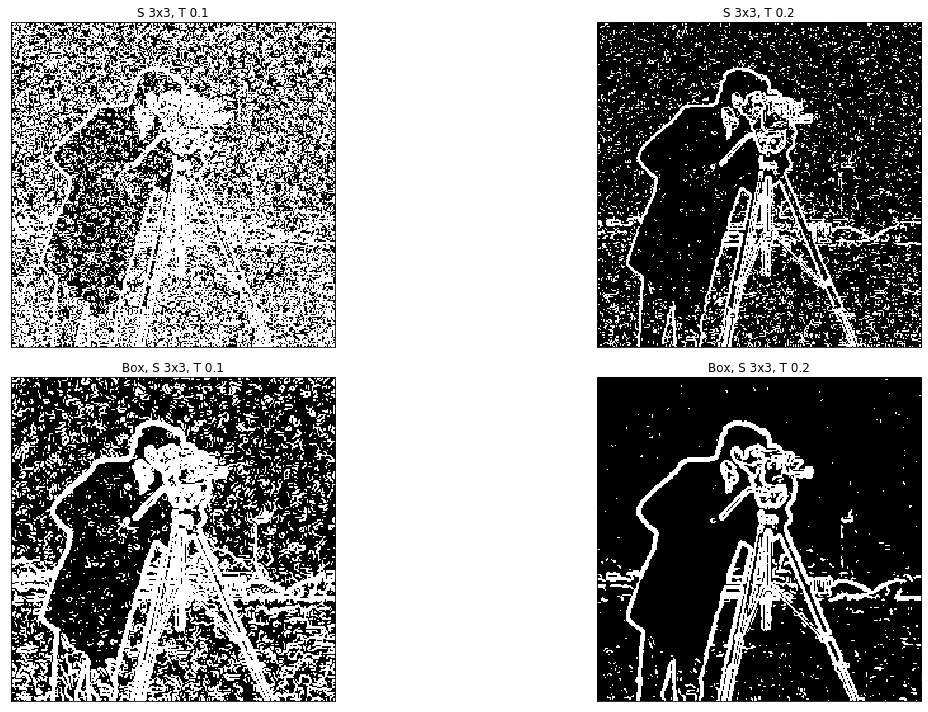

In [437]:
# filter image using a 3x3 box filter
res_boxcamera = cv2.blur(img_gausscameraman, (3,3))

# apply a 3x3 Sobel filter to the x and y intensities of the images
I_g3x = cv2.Sobel(img_gausscameraman, cv2.CV_64F, 1, 0, ksize=3)
I_g3y = cv2.Sobel(img_gausscameraman, cv2.CV_64F, 0, 1, ksize=3)

I_gb3x = cv2.Sobel(res_boxcamera, cv2.CV_64F, 1, 0, ksize=3)
I_gb3y = cv2.Sobel(res_boxcamera, cv2.CV_64F, 0, 1, ksize=3)

# calculate the Sobel magnitude
gausssobel_3 = cv2.magnitude(I_g3x, I_g3y)
gaussboxsobel_3 = cv2.magnitude(I_gb3x, I_gb3y)

# find the max values to determine the threshold
max_val4 = np.max(gausssobel_3)
max_val5 = np.max(gaussboxsobel_3)

# apply the sobel filter to the images of the cameraman at different thresholds
ret, img_gaussthresh1_3 = cv2.threshold(gausssobel_3, max_val4*0.1, 255, cv2.THRESH_BINARY)
ret, img_gaussthresh2_3 = cv2.threshold(gausssobel_3, max_val4*0.2, 255, cv2.THRESH_BINARY)

ret, img_gaussboxthresh1_3 = cv2.threshold(gaussboxsobel_3, max_val5*0.1, 255, cv2.THRESH_BINARY)
ret, img_gaussboxthresh2_3 = cv2.threshold(gaussboxsobel_3, max_val5*0.2, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize = (20, 10))
plt.subplot(221), plt.imshow(img_gaussthresh1_3, cmap="gray")
plt.title("S 3x3, T 0.1"), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(img_gaussthresh2_3, cmap="gray")
plt.title("S 3x3, T 0.2"), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(img_gaussboxthresh1_3, cmap="gray")
plt.title("Box, S 3x3, T 0.1"), plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(img_gaussboxthresh2_3, cmap="gray")
plt.title("Box, S 3x3, T 0.2"), plt.xticks([]), plt.yticks([])

plt.tight_layout()


It can be observed that denoising the images prior to edge detection yields a far better result in terms of actually extracting edge points of interest. What I mean by that is, while edges are detected by differences in intensity, by removing the noise (which adds areas of changing intensity that are not representative of the scene), edges that physically exist can be better extracted from the image. This becomes obvious when comparing the images of the sobel filtered image with a threshold of 10% with and without box filtering. Whereas the image that was filtered resembles the original image, the image without filtering does not. 

## Part 3: Laplacian of Gaussian

### Questions  1 - 2

(Text(0.5, 1.0, 'LoG Edge Det.'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

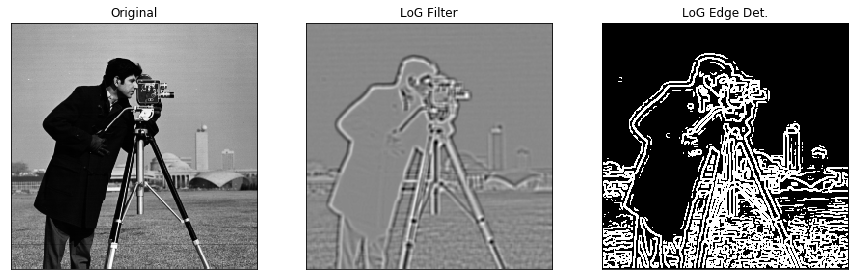

In [438]:
# filter image using 5x5 Gaussian, with variance 2 
res_gaussian_cameraman = cv2.GaussianBlur(img_cameraman, (5,5), 2)

# apply thresholding to perform edge detection
ret, thresh_gausscameraman = cv2.threshold(res_gaussian_cameraman, 100, 255, cv2.THRESH_BINARY)

# apply a 5x5 Laplacian filter
lap_gausscameraman = cv2.Laplacian(res_gaussian_cameraman, cv2.CV_32F, ksize=5)
lap_threshgausscameraman = cv2.Laplacian(thresh_gausscameraman, cv2.CV_32F, ksize=5)

# set up variables for using zero-crossings to detect edges
output = np.zeros(lap_gausscameraman.shape)
w = output.shape[1]
h = output.shape[0]

# compute a threshold for differences between the LoG, evaluated to just be the mean of values
thresh = np.absolute(lap_gausscameraman).mean()

# compute the zero crossings on LoG
# traverse over the image, checking to see if edge pixels are zero-crossings while also checking if the
# difference in their local value is greater than our threshold
for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = lap_gausscameraman[y - 1: y + 2, x - 1:x + 2]
        p = lap_gausscameraman[y, x]
        maxp = patch.max()
        minp = patch.min()
        if(p > 0):
            zeroCross = True if minp < 0 else False
        else:
            zeroCross = True if maxp > 0 else False
        if((maxp - minp) > thresh) and zeroCross:
            output[y,x] = 1

# display images
plt.figure(figsize = (15, 15))
plt.subplot(131), plt.imshow(img_cameraman, cmap="gray")
plt.title("Original"), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(lap_gausscameraman, cmap="gray")
plt.title("LoG Filter"), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(output, cmap="gray")
plt.title("LoG Edge Det."), plt.xticks([]), plt.yticks([])


## Part 4: Derivative of Gaussian

### Question 1

In [439]:
# create a Gaussian kernel
temp = cv2.getGaussianKernel(7, -1)
Gauss = np.outer(temp, temp.transpose())

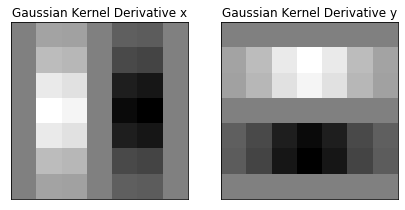

In [440]:
# apply a 3x3 Sobel kernel in the x and y directions 
gauss_Kx = cv2.Sobel(Gauss, cv2.CV_64F, 1, 0, ksize=3)
gauss_Ky = cv2.Sobel(Gauss, cv2.CV_64F, 0, 1, ksize=3)

# show images
plt.subplot(121), plt.imshow(gauss_Kx, cmap="gray")
plt.title("Gaussian Kernel Derivative x"), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(gauss_Ky, cmap="gray")
plt.title("Gaussian Kernel Derivative y"), plt.xticks([]), plt.yticks([])

plt.tight_layout()

(Text(0.5, 1.0, 'Derivative of Gaussian Kernel, T 0.2'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

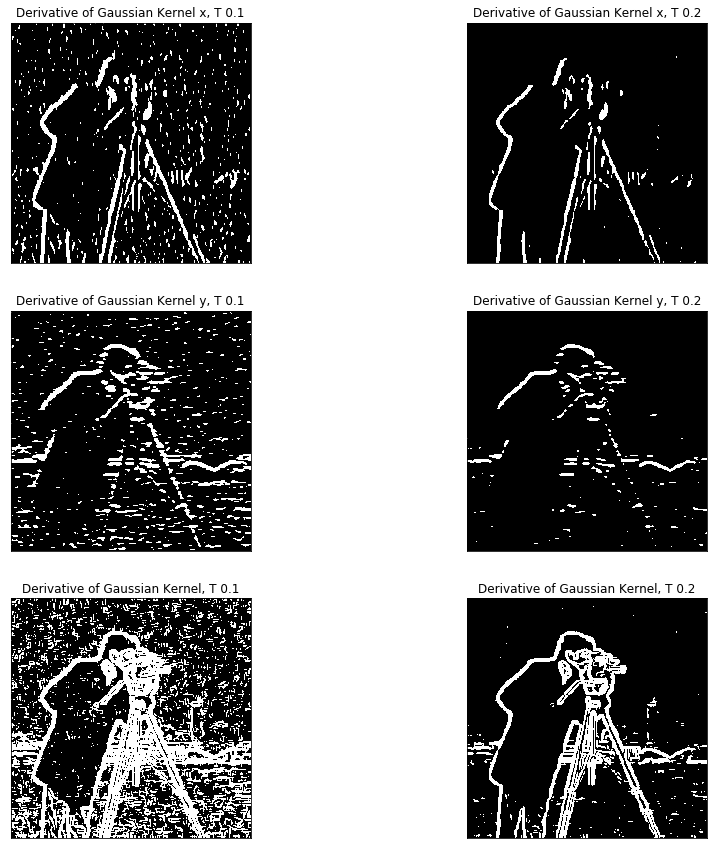

In [441]:
# apply the Gaussian derivatives to the x and y of the image
gauss_deriv_x = cv2.filter2D(img_gausscameraman, cv2.CV_64F, gauss_Kx)
gauss_deriv_y = cv2.filter2D(img_gausscameraman, cv2.CV_64F, gauss_Ky)

# find the and max value for thresholding
max_val6 = np.max(gauss_deriv_x)
max_val9 = np.max(gauss_deriv_y)

gauss_deriv = cv2.magnitude(gauss_deriv_x,gauss_deriv_y)
max_val10 = np.max(gauss_deriv)

# apply the sobel filter to the images of the cameraman at different thresholds
ret, gauss_threshxk1 = cv2.threshold(gauss_deriv_x, max_val6*0.1, 255, cv2.THRESH_BINARY)
ret, gauss_threshxk2 = cv2.threshold(gauss_deriv_x, max_val6*0.2, 255, cv2.THRESH_BINARY)

ret, gauss_threshyk1 = cv2.threshold(gauss_deriv_y, max_val9*0.1, 255, cv2.THRESH_BINARY)
ret, gauss_threshyk2 = cv2.threshold(gauss_deriv_y, max_val9*0.2, 255, cv2.THRESH_BINARY)

ret, gauss_threshk1 = cv2.threshold(gauss_deriv, max_val10*0.1, 255, cv2.THRESH_BINARY)
ret, gauss_threshk2 = cv2.threshold(gauss_deriv, max_val10*0.2, 255, cv2.THRESH_BINARY)

# show images
plt.figure(figsize = (15, 15))
plt.subplot(321), plt.imshow(gauss_threshxk1, cmap="gray")
plt.title("Derivative of Gaussian Kernel x, T 0.1"), plt.xticks([]), plt.yticks([])

plt.subplot(322), plt.imshow(gauss_threshxk2, cmap="gray")
plt.title("Derivative of Gaussian Kernel x, T 0.2"), plt.xticks([]), plt.yticks([])

plt.subplot(323), plt.imshow(gauss_threshyk1, cmap="gray")
plt.title("Derivative of Gaussian Kernel y, T 0.1"), plt.xticks([]), plt.yticks([])

plt.subplot(324), plt.imshow(gauss_threshyk2, cmap="gray")
plt.title("Derivative of Gaussian Kernel y, T 0.2"), plt.xticks([]), plt.yticks([])

plt.subplot(325), plt.imshow(gauss_threshk1, cmap="gray")
plt.title("Derivative of Gaussian Kernel, T 0.1"), plt.xticks([]), plt.yticks([])

plt.subplot(326), plt.imshow(gauss_threshk2, cmap="gray")
plt.title("Derivative of Gaussian Kernel, T 0.2"), plt.xticks([]), plt.yticks([])

### Question 2

(Text(0.5, 1.0, 'Denoised 3x3 Sobel Edge, T 0.2'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

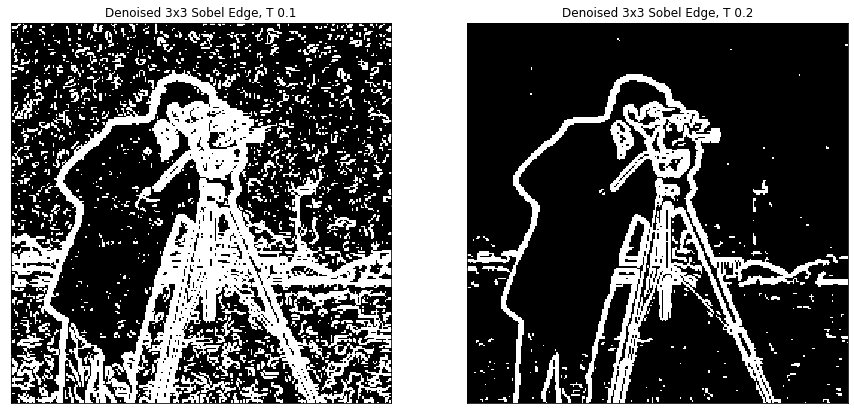

In [442]:
# create a Gaussian kernel
temp1 = cv2.getGaussianKernel(5, -1)
Gauss2 = np.outer(temp1, temp1.transpose())

# denoise the image using a 5x5 Gaussian kernel
denoise_gauss = cv2.filter2D(img_gausscameraman, cv2.CV_64F, Gauss2)

# apply a 3x3 Sobel edge detector
denoise_gauss_Kx = cv2.Sobel(denoise_gauss, cv2.CV_64F, 1, 0, ksize=3)
denoise_gauss_Ky = cv2.Sobel(denoise_gauss, cv2.CV_64F, 0, 1, ksize=3)

# find the magnitude and max value for thresholding
denoise_gaussderiv = cv2.magnitude(denoise_gauss_Kx, denoise_gauss_Ky)
max_val7 = np.max(denoise_gaussderiv)

# apply the sobel filter to the images of the cameraman at different thresholds
ret, dgauss_threshk1 = cv2.threshold(denoise_gaussderiv, max_val7*0.1, 255, cv2.THRESH_BINARY)
ret, dgauss_threshk2 = cv2.threshold(denoise_gaussderiv, max_val7*0.2, 255, cv2.THRESH_BINARY)

# show images
plt.figure(figsize = (15, 15))
plt.subplot(121), plt.imshow(dgauss_threshk1, cmap="gray")
plt.title("Denoised 3x3 Sobel Edge, T 0.1"), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(dgauss_threshk2, cmap="gray")
plt.title("Denoised 3x3 Sobel Edge, T 0.2"), plt.xticks([]), plt.yticks([])

### Question 3

(Text(0.5, 1.0, '3x3 Sobel on Noisy image, T 0.2'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

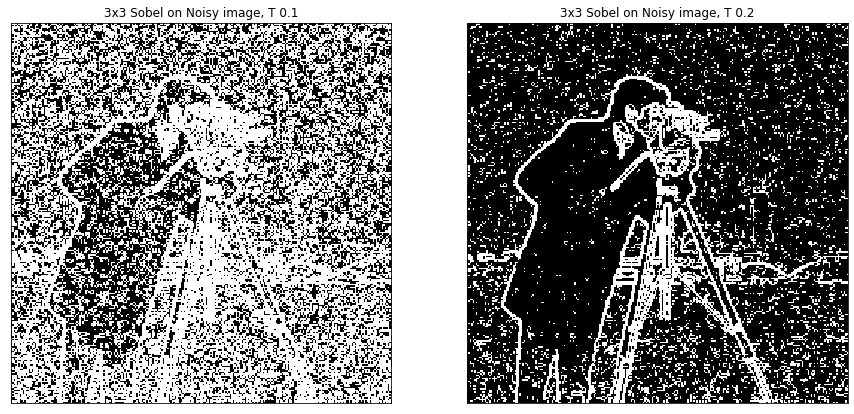

In [443]:
# apply a 3x3 Sobel edge detector
s_gauss_Kx = cv2.Sobel(img_gausscameraman, cv2.CV_64F, 1, 0, ksize=3)
s_gauss_Ky = cv2.Sobel(img_gausscameraman, cv2.CV_64F, 0, 1, ksize=3)

# find the magnitude and max value for thresholding
s_gauss = cv2.magnitude(s_gauss_Kx, s_gauss_Ky)
max_val8 = np.max(s_gauss)

# apply the sobel filter to the images of the cameraman at different thresholds
ret, s_threshk1 = cv2.threshold(s_gauss, max_val8*0.1, 255, cv2.THRESH_BINARY)
ret, s_threshk2 = cv2.threshold(s_gauss, max_val8*0.2, 255, cv2.THRESH_BINARY)

# show images
plt.figure(figsize = (15, 15))
plt.subplot(121), plt.imshow(s_threshk1, cmap="gray")
plt.title("3x3 Sobel on Noisy image, T 0.1"), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(s_threshk2, cmap="gray")
plt.title("3x3 Sobel on Noisy image, T 0.2"), plt.xticks([]), plt.yticks([])

It can be observed that the first two methods, using the derivative of the Gaussian and denoising the noisy image first with a Gaussian yield good results in detecting the edges of the image. Using the Sobel edge detector right off the bat yielded the worst results, the image remained noisy and as a result, the noise carries onto the edge detection. Using the derivative of a Gaussian and applying a 5x5 Gaussian kernel to denoise the image yielded very similar results. The amount of denoising, and therefore the clarify of the edges at both thresholds are nearly identical. However, very slightly, the edge detection is better with the application of the 5x5 Gaussian kernel onto the noisy image than that of the derivative of a Gaussian kernel. However it's only very marginal, there is less noise detected in the sky for the 5x5 Gaussian kernel, but less noise on the ground with the derivative of a Gaussian kernel. 

## Part 5: Canny Edge Detection

### Question 1

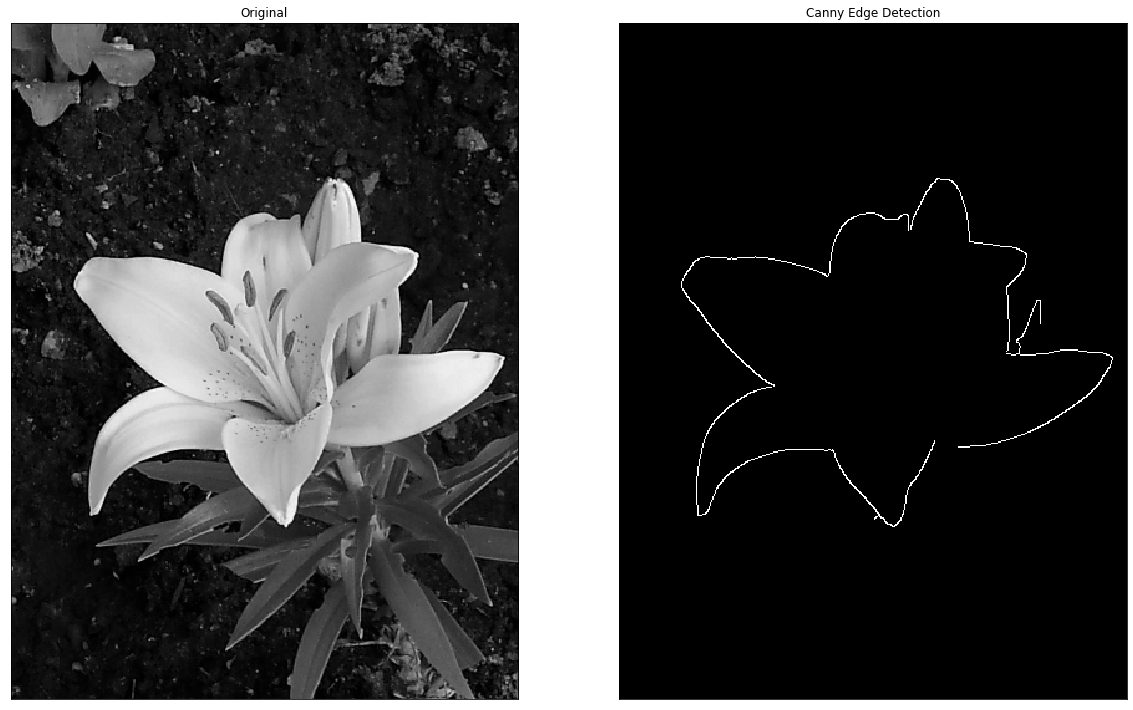

In [444]:
# import image
image_path6 = "./yellowlily.png"
img_lily = cv2.imread(image_path6, cv2.IMREAD_GRAYSCALE)

# blur image before-hand
img_blily = cv2.GaussianBlur(img_lily, (5, 5), 0)

# compute Canny edges
img_clily = cv2.Canny(img_blily, 160, 505)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img_lily, cmap="gray")
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_clily, cmap="gray")
plt.title("Canny Edge Detection"), plt.xticks([]), plt.yticks([])
plt.show()

### Question 2

By changing the kernel size, this affects the size of the Gaussian filter that gets swept over the image to blur it. Therefore, if you'd like to keep small details, it's best to have a smaller kernel so that small details are not lost as the Gaussian kernal blurs the image, resulting in a loss of small detailed information. For example, because we wanted to retain small details like the leaf that peeks out from under the lily, I opted to start with a smaller kernel size so that it's gradient intensity isn't lessened by the blurring. This is important because it could potentially become lost information when defining the upper and lower bounds of the hysteresis thresholding. 

The upper and lower bounds define the first and second thresholds for the hysteresis thresholding. Therefore, adjusting this value will change which edges are kept and which are disgarded. If the edge intensity gradient is above or below the upper or lower bounds respectively, then it is disregarded. Therefore, adjusting these bounds allows you to hone in on edges of interest. In this case, because the desired output detects the most prominent edges, the outline of the lily, I kept the top bound high while adjusting the lower one to cut out noise and small intensity gradients (like a rock in soil). After I found myself at a lower bound that kept most of this, I adjusted the top bound to cut out edges that weren't the outline of the lily. 